# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Print to logger
print("Beginning Data Retrieval")
print("------------------------")

url =f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

city_data = []

# create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #group the cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        #rest the group every 50 counts of cities
        set_count += 1
        record_count = 1
        
    #create the enpoint url for each city
    city_url = f"{url}&q={city}"
    
    #log the record and the set number
    print(f"Processing city #{record_count} in group #{set_count} | {city}")
    record_count += 1
    
    try:
        #run API request and retrieve the data
        city_weather = requests.get(city_url).json()
        
        #add a time delay to avoid blowing out the API key
        time.sleep(2)
        
        #Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #append the city information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        
    except:
        #if an error occurs whe making the API call, skip city
        print(f"{city} has an error. Skipping.....")
        pass

# Indicate that the data is complete 
print("---------------------------")
print("Data Retrieval Complete    ")
print("---------------------------")
    

Beginning Data Retrieval
------------------------
Processing city #1 in group #1 | yerbogachen
Processing city #2 in group #1 | nikolskoye
Processing city #3 in group #1 | rikitea
Processing city #4 in group #1 | hermanus
Processing city #5 in group #1 | chiredzi
Processing city #6 in group #1 | lorengau
Processing city #7 in group #1 | pachino
Processing city #8 in group #1 | victoria
Processing city #9 in group #1 | kapaa
Processing city #10 in group #1 | lethem
Processing city #11 in group #1 | busselton
Processing city #12 in group #1 | punta arenas
Processing city #13 in group #1 | namibe
Processing city #14 in group #1 | coihueco
Processing city #15 in group #1 | lompoc
Processing city #16 in group #1 | bethel
Processing city #17 in group #1 | puerto ayora
Processing city #18 in group #1 | brokopondo
Processing city #19 in group #1 | longyearbyen
Processing city #20 in group #1 | viligili
viligili has an error. Skipping.....
Processing city #21 in group #1 | taoudenni
Processing 

Processing city #27 in group #4 | saint-joseph
Processing city #28 in group #4 | dunedin
Processing city #29 in group #4 | norman wells
Processing city #30 in group #4 | mahebourg
Processing city #31 in group #4 | castro
Processing city #32 in group #4 | mufulira
Processing city #33 in group #4 | phanat nikhom
Processing city #34 in group #4 | new norfolk
Processing city #35 in group #4 | chifeng
Processing city #36 in group #4 | sinnamary
Processing city #37 in group #4 | cape coast
Processing city #38 in group #4 | ilorin
Processing city #39 in group #4 | el balyana
el balyana has an error. Skipping.....
Processing city #40 in group #4 | bonthe
Processing city #41 in group #4 | tarakan
Processing city #42 in group #4 | westport
Processing city #43 in group #4 | pokhara
Processing city #44 in group #4 | coolum beach
Processing city #45 in group #4 | saleaula
saleaula has an error. Skipping.....
Processing city #46 in group #4 | resistencia
Processing city #47 in group #4 | aflu
aflu h

Processing city #5 in group #8 | champerico
Processing city #6 in group #8 | los llanos de aridane
Processing city #7 in group #8 | sorland
Processing city #8 in group #8 | teya
Processing city #9 in group #8 | louisbourg
louisbourg has an error. Skipping.....
Processing city #10 in group #8 | port blair
Processing city #11 in group #8 | bad schwartau
Processing city #12 in group #8 | klaksvik
Processing city #13 in group #8 | el seibo
Processing city #14 in group #8 | leningradskiy
Processing city #15 in group #8 | port angeles
Processing city #16 in group #8 | khuzdar
Processing city #17 in group #8 | clyde river
Processing city #18 in group #8 | attawapiskat
attawapiskat has an error. Skipping.....
Processing city #19 in group #8 | beberibe
Processing city #20 in group #8 | nhulunbuy
Processing city #21 in group #8 | igrim
Processing city #22 in group #8 | astana
Processing city #23 in group #8 | fortuna
Processing city #24 in group #8 | yar-sale
Processing city #25 in group #8 | es

Processing city #35 in group #11 | kalomo
kalomo has an error. Skipping.....
Processing city #36 in group #11 | tabory
Processing city #37 in group #11 | ossora
Processing city #38 in group #11 | yeppoon
Processing city #39 in group #11 | amuntai
Processing city #40 in group #11 | mutoko
Processing city #41 in group #11 | khonsa
Processing city #42 in group #11 | lolua
lolua has an error. Skipping.....
Processing city #43 in group #11 | bukama
Processing city #44 in group #11 | ashington
Processing city #45 in group #11 | conceicao do araguaia
Processing city #46 in group #11 | bolshaya dzhalga
Processing city #47 in group #11 | fort saint john
fort saint john has an error. Skipping.....
Processing city #48 in group #11 | srednekolymsk
Processing city #49 in group #11 | kambove
Processing city #50 in group #11 | papar
Processing city #1 in group #12 | fort frances
Processing city #2 in group #12 | glubokoe
glubokoe has an error. Skipping.....
Processing city #3 in group #12 | mhasla
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yerbogachen,61.2767,108.0108,16.79,96,73,3.83,RU,1635271106
1,nikolskoye,59.7035,30.7861,45.88,87,100,7.45,RU,1635270648
2,rikitea,-23.1203,-134.9692,75.11,79,100,18.75,PF,1635270625
3,hermanus,-34.4187,19.2345,64.80,82,94,18.16,ZA,1635270599
4,chiredzi,-21.0500,31.6667,73.44,60,35,8.50,ZW,1635271115


In [9]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,19.560597,23.498596,60.697942,72.451264,59.238267,7.867581,1.635272e+09
std,33.555148,89.941695,23.026822,19.990196,37.250643,6.102027,4.609434e+02
min,-54.800000,-179.166700,-20.560000,8.000000,0.000000,0.000000,1.635270e+09
25%,-7.807925,-55.104200,46.620000,62.000000,22.250000,3.575000,1.635271e+09
50%,21.452950,25.023750,66.745000,77.000000,71.500000,6.220000,1.635272e+09
75%,48.913650,106.158850,78.405000,87.000000,94.750000,10.595000,1.635272e+09
max,78.218600,179.316700,101.590000,100.000000,100.000000,42.570000,1.635273e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"]> 100)].index

print(dirty_city_data)

Int64Index([], dtype='int64')


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yerbogachen,61.2767,108.0108,16.79,96,73,3.83,RU,1635271106
1,nikolskoye,59.7035,30.7861,45.88,87,100,7.45,RU,1635270648
2,rikitea,-23.1203,-134.9692,75.11,79,100,18.75,PF,1635270625
3,hermanus,-34.4187,19.2345,64.80,82,94,18.16,ZA,1635270599
4,chiredzi,-21.0500,31.6667,73.44,60,35,8.50,ZW,1635271115


In [64]:
#Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]
                            
#Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

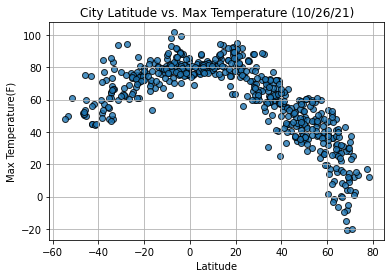

In [22]:
#Plot scatter plot for Latitude vs. Temperature Plot

plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities",)

#Plot properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(True)

#Save figure to output folder
plt.savefig("output_data/Fig1.png")

## Latitude vs. Humidity Plot

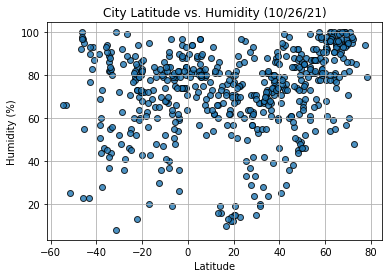

In [24]:
#Plot scatter plot for Latitude vs. Humidity Plot

plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities",)

#Plot properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Save figure to output folder
plt.savefig("output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

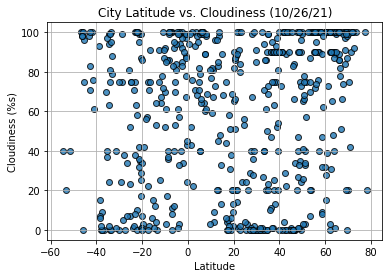

In [25]:
#Plot scatter plot for Latitude vs. Cloudiness Plot
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities",)

#Plot properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%s)")
plt.grid(True)

#Save figure to output folder
plt.savefig("output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

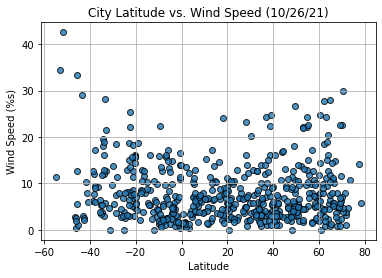

In [32]:
#Plot scatter plot for Latitude vs. Wind Speed Plot
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities",)

#Plot properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%s)")
plt.grid(True)

#Save figure to output folder
plt.savefig("output_data/Fig4.png")

## Linear Regression

In [37]:
#Create a function to create Linear Regression Plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # run a regression on the hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is:{rvalue**2}")
    plt.show()

In [38]:
#Create the Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >=0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.7597400286021752


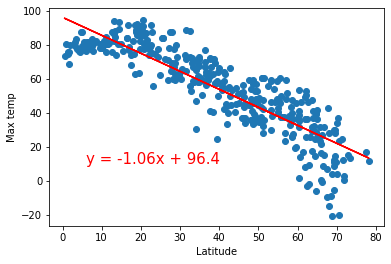

In [62]:
#Linear regression on Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 'Max temp', (6,10))



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.49761957291758435


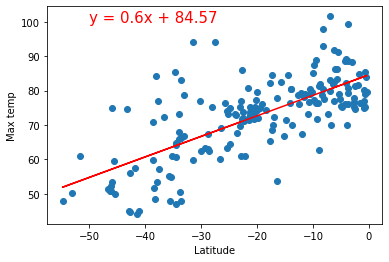

In [63]:
#Linear regression on Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 'Max temp', (-50,100))



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.1104625481885948


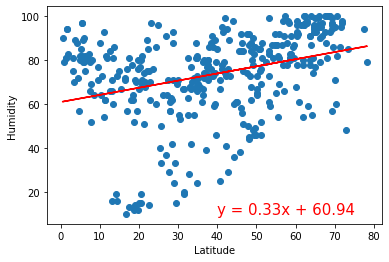

In [45]:
#Linear regression on Northern Hemisphere- Humidity (%) vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.0007130546591827284


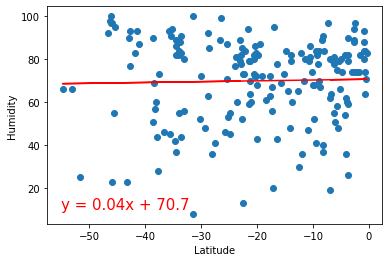

In [48]:
#Linear regression on Southern Hemisphere- Humidity (%) vs. Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-55,10))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.03579687829116485


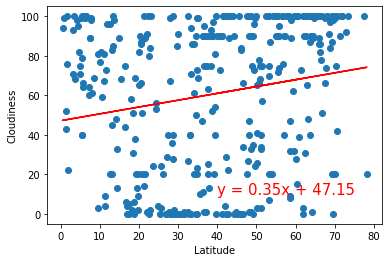

In [49]:
#Linear regression on Northern Hemisphere- Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.01525518102610935


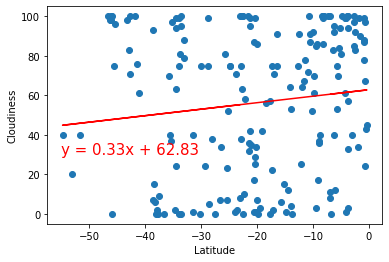

In [52]:
#Linear regression on Southern Hemisphere- Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:0.026591418572427746


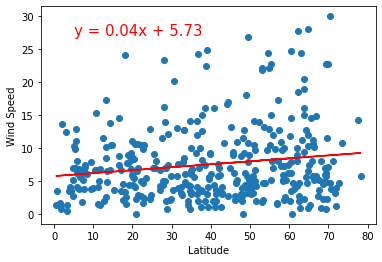

In [55]:
#Linear regression on Northern Hemisphere- Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (5,27))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:0.07165513622047492


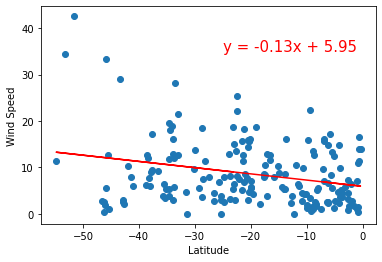

In [57]:
#Linear regression on Southern Hemisphere- Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-25,35))